In [1]:
import numpy as np
import evolve as iv
import matplotlib.pyplot as plt

Part (A)

Using $ F = \frac{G \cdot M_s \cdot m}{r^2} + \frac{\alpha}{r^4}$
$$

\bar{m} = \frac{m}{m_0}, \quad \bar{r} = \frac{r}{r_0}, \quad \bar{t} = \frac{t}{t_0}, \quad \bar{F} = \frac{F}{F_0}



m_0 = m, \quad r_0 = r, \quad t_0 = \sqrt{\frac{4\pi^2r^3}{GM_s}}, \quad F_0 = \frac{m}{r} \sqrt{\frac{GM_s}{r}}

$$

Then in dimensionless it becomes $\bar{F} = \frac{ \bar{m}}{\bar{r}^2} + \frac{\alpha}{\bar{r}^4}$ and each componet is 
$$

\bar{F}_x = \frac{G \cdot M_s \cdot \bar{m} \cdot x}{r^{3/2}} + \frac{\alpha  x}{r^{4}}
$$
$$
\bar{F}_y = \frac{G \cdot M_s \cdot \bar{m} \cdot y}{r^{3/2}} + \frac{\alpha  y}{r^{4}}


$$


In [2]:
G_SI = 6.674e-11
G = 1.99353-44

M_sun = 1.989e30
AU = 1.496e11
Year = 31557600

M_mur = .33e24
rp_mur = 46.0e9
e_mur = .205

def orbit(M1,m2,rp,e,N,dt,alpha):
    def zeta(xi,t=None,param=None):
        r = (xi[0]*xi[0]+xi[1]*xi[1])**1.5
        return np.array([xi[2],xi[3],
                          -4*np.pi*np.pi*xi[0]/r+((alpha*xi[0])/r**4),
                          -4*np.pi*np.pi*xi[1]/r+((alpha*xi[1])/r**4)])
    if alpha > 0:
        a = rp/(1+e)
    else:
        a = rp/(1-e)
    chi = a
    M = M1+m2
    tau = np.sqrt(4*np.pi*np.pi*(a**3)/(G_SI*M))



    t_init = 0.0
    v = np.sqrt((1+e)*G_SI*M1/rp)
    scale = np.array([tau,chi,chi,chi/tau,chi/tau])
    init = np.array([rp,0,0,v])
    t = np.arange(0,N*dt,dt)
    traj = iv.evolve(init,t_init,dt,N,zeta,
                     iv.rk4_step,scale)

    for f in traj:
        l = [m2/M*f[0]/AU,m2/M*f[1]/AU,
             -M1/M*f[0]/AU,-M1/M*f[1]/AU,
             m2/M*f[2],m2*M*f[3],
             -M1/M*f[2],-M1/M*f[3]]
        
        try:
            complete_traj.append(l)
        except NameError:
            complete_traj = [l]
    return t,complete_traj

Part (B)

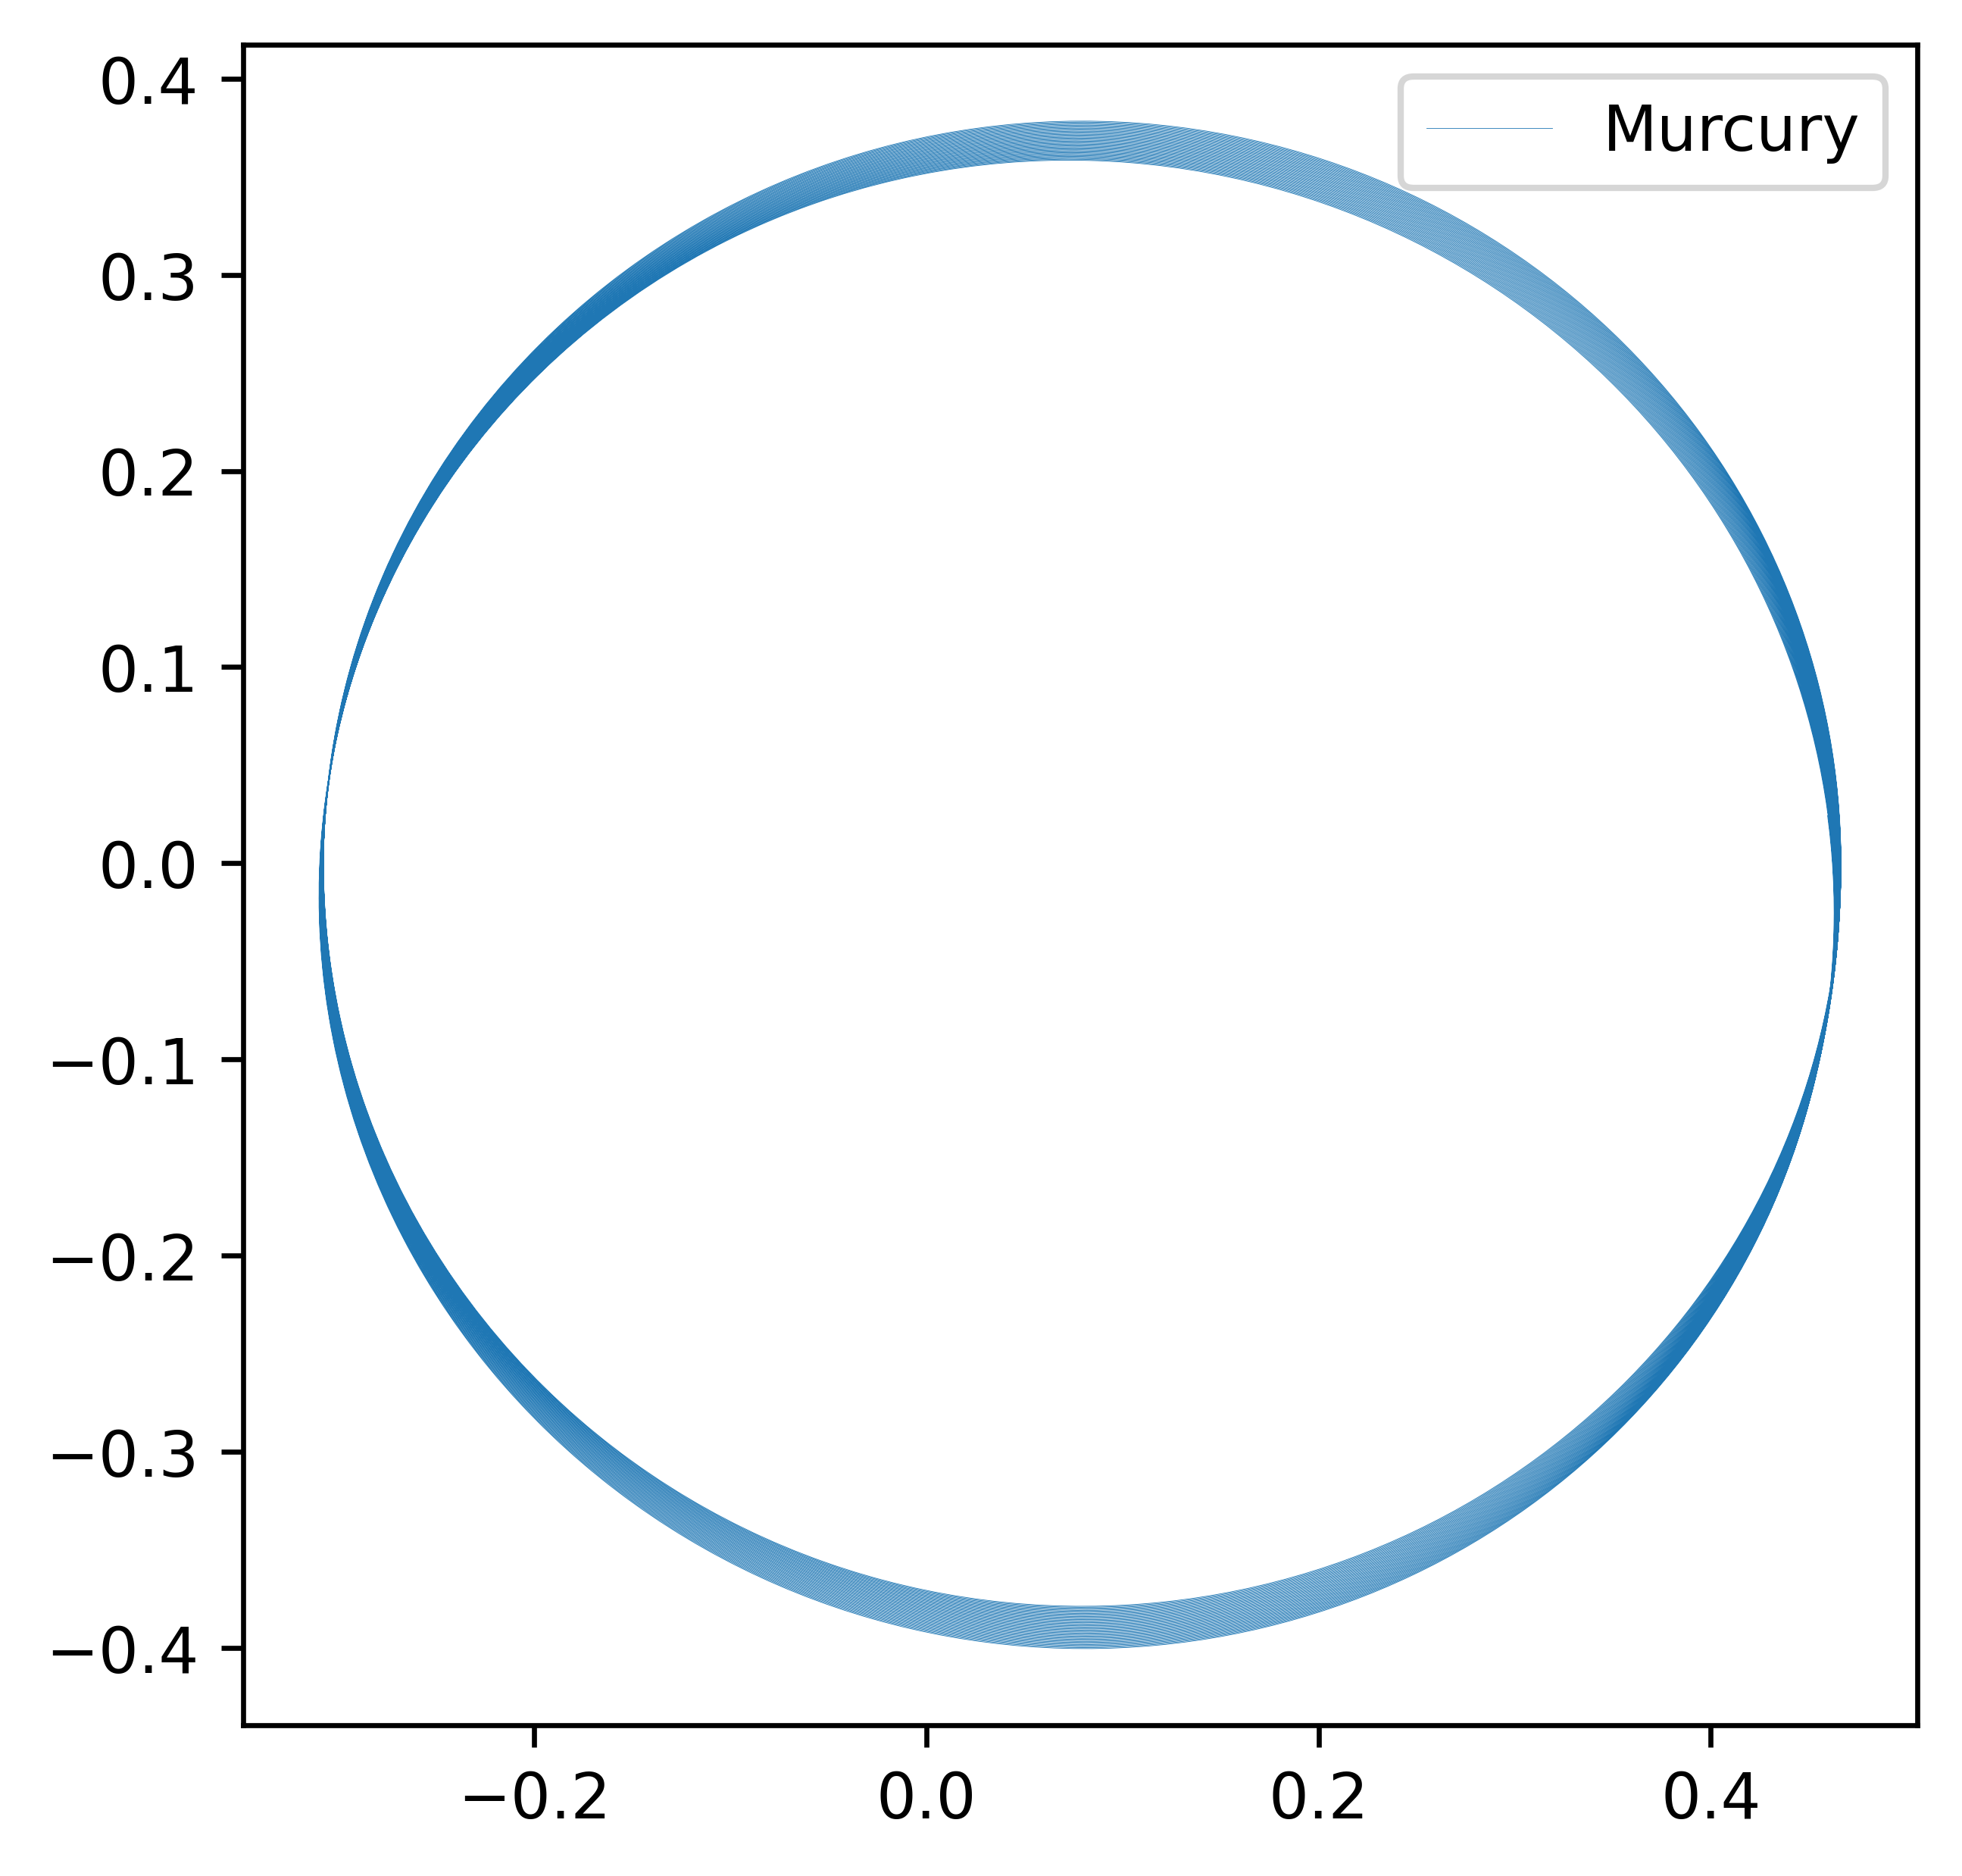

In [3]:
dt = 0.001
dt = dt * Year

# Define alpha
alpha = .2


t_mur, traj_mur = orbit(M_sun, M_mur, rp_mur, e_mur, 10000, dt, alpha)

x= [frame[2] for frame in traj_mur]
y= [frame[3] for frame in traj_mur]


fig = plt.figure()
ax = fig.add_subplot()

ax.set_aspect('equal')

ax.plot(x,y,label='Murcury',linewidth =.1)


plt.gcf().set_dpi(600)
ax.legend()
plt.show()

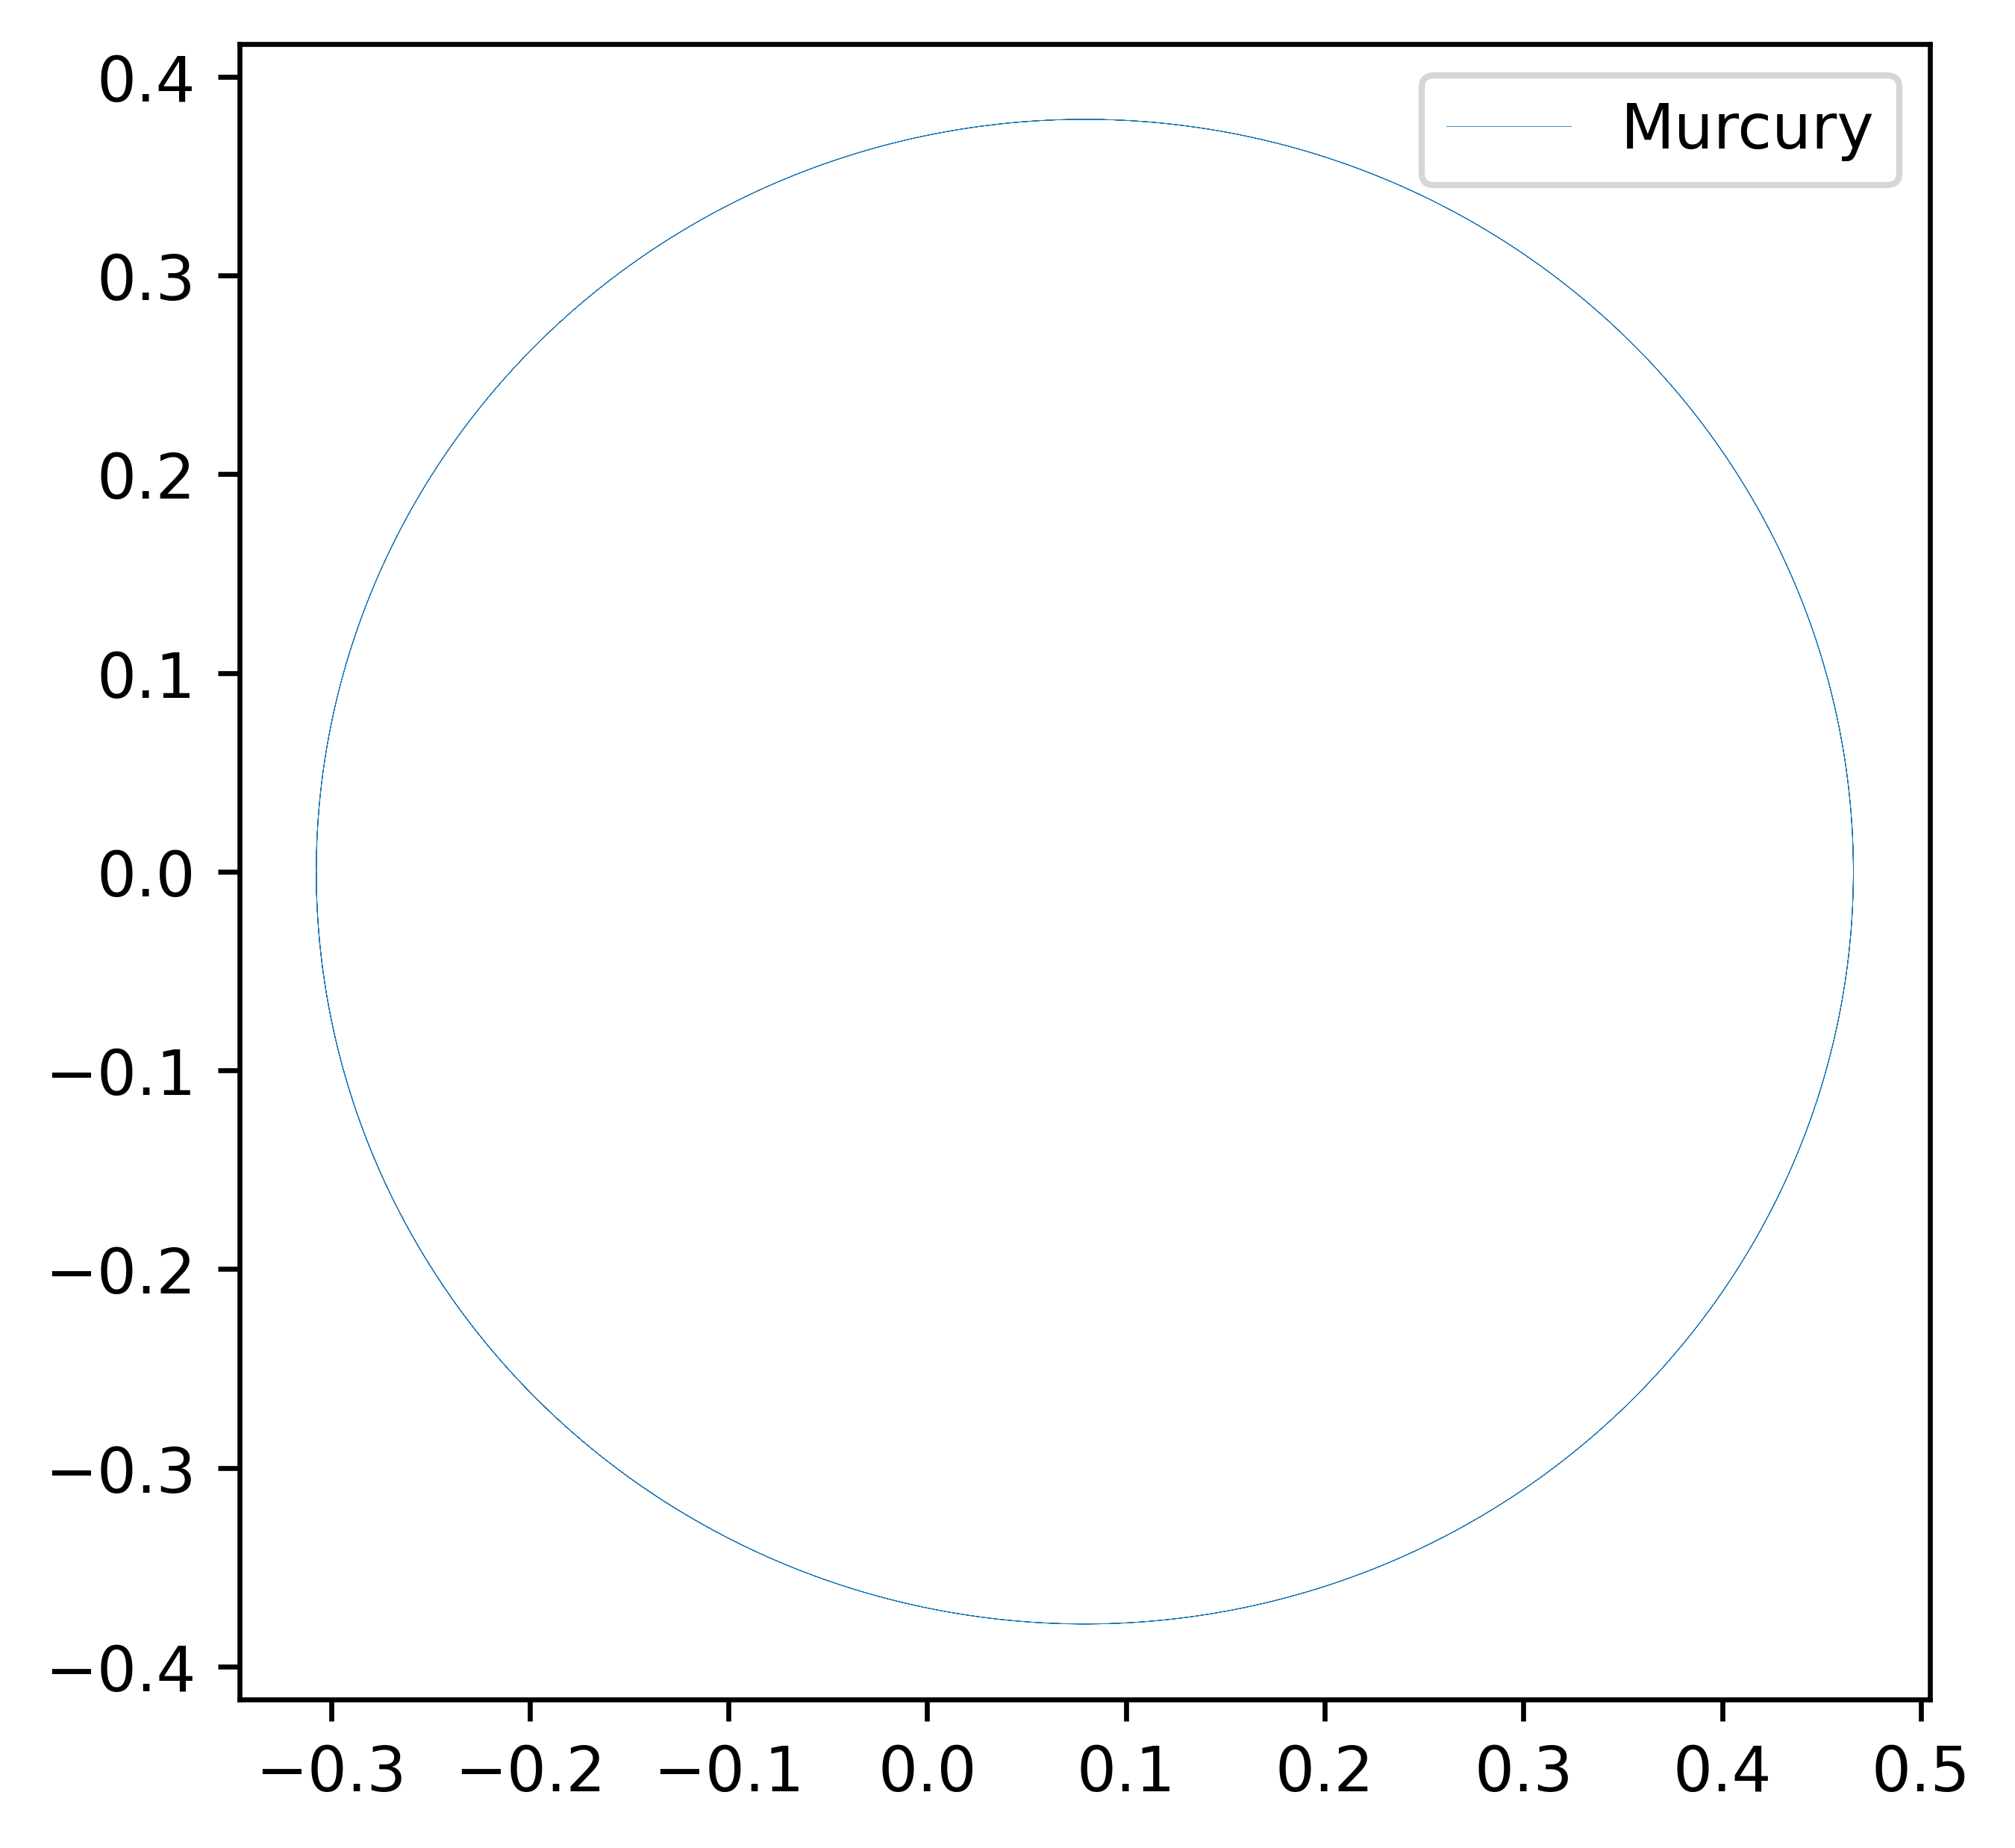

In [4]:
t_mur, traj_mur = orbit(M_sun, M_mur, rp_mur, e_mur, 1000, dt, alpha=0)


x= [frame[2] for frame in traj_mur]
y= [frame[3] for frame in traj_mur]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.plot(x,y,label='Murcury',linewidth =.1)
plt.gcf().set_dpi(600)
ax.legend()
plt.show()

To account for the correction, the $\frac{\alpha}{r^4}$ term was simply added to both the $x$ and $y$ components in the zeta function, with $xi[0]$ being the $x$ component of the correction and $xi[1]$ being the $y$ component. The $a = \frac{\text{rp}}{1+e}$ term was needed to model the orbit given the initial conditions and was obtained from the textbook referenced in the reference section.


Part (C)

Below are shown two orbits with different values of $\alpha$. Here, it is shown that the stronger the bending of gravity, or value of $\alpha$, the faster the orbit will precess.


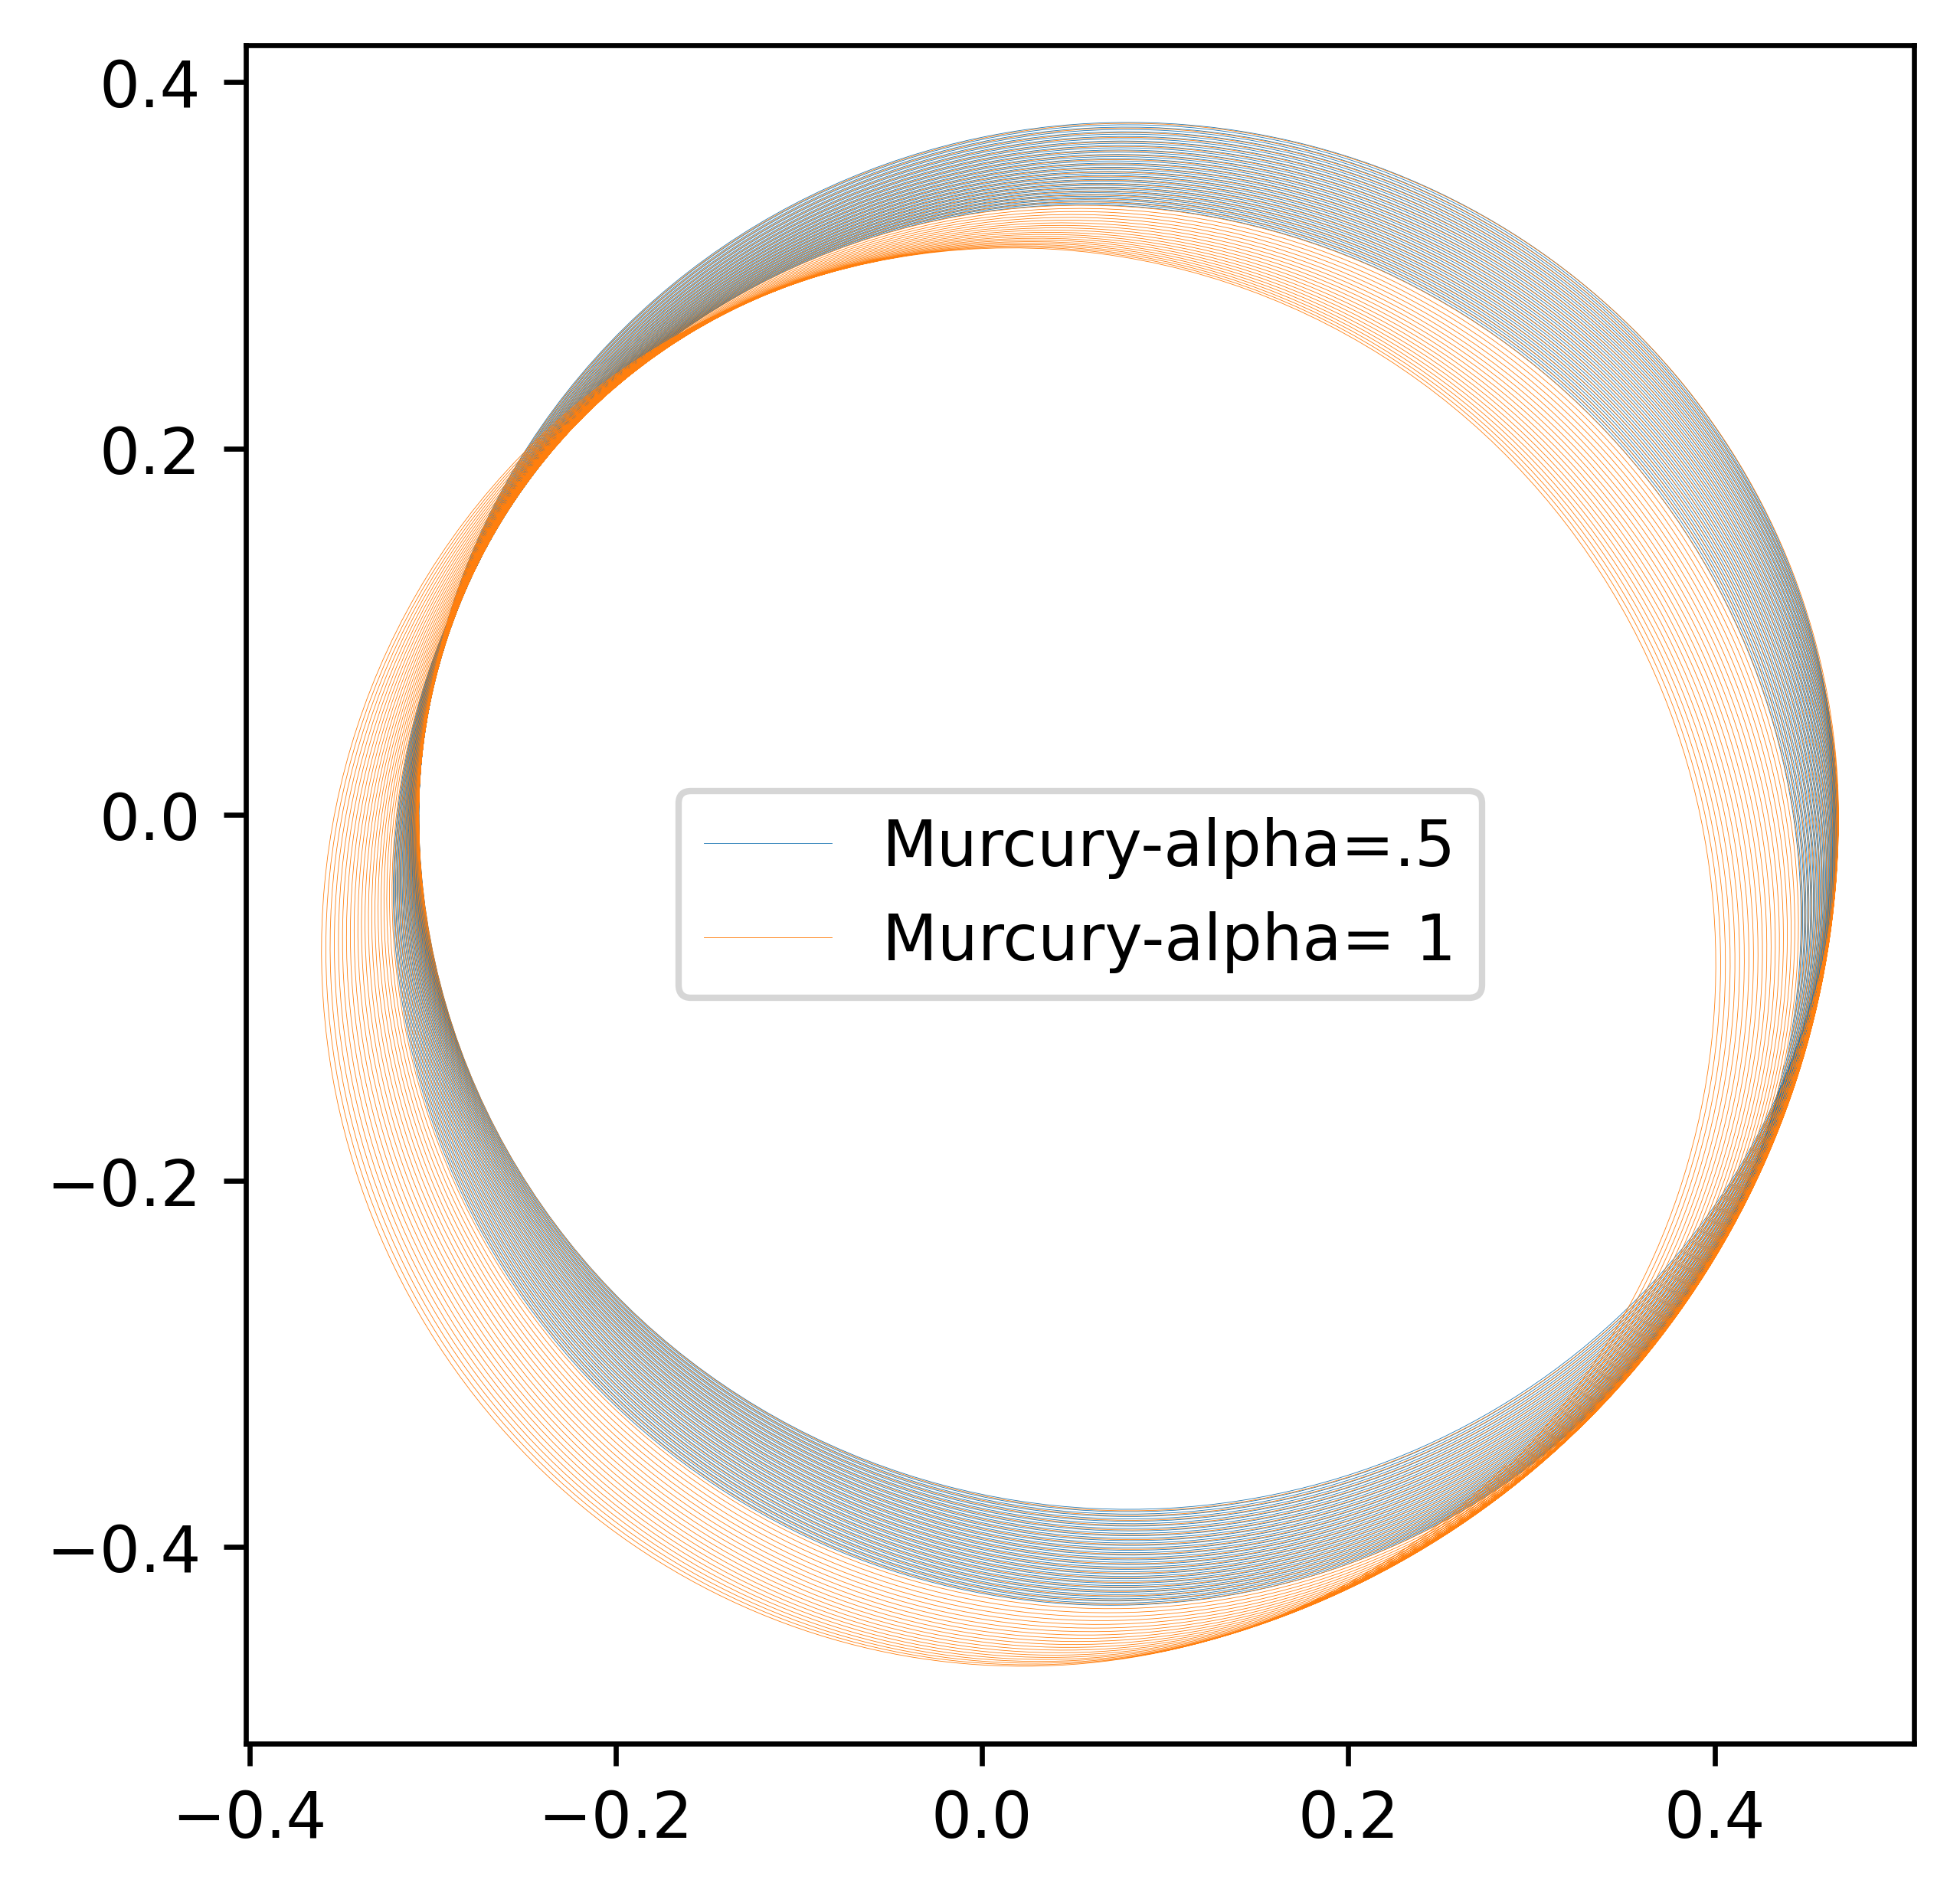

In [5]:
dt = 0.001
dt = dt * Year

# Define alpha
alpha1 = .5
alpha2 = 1

t_mur, traj_mur = orbit(M_sun, M_mur, rp_mur, e_mur, 10000, dt, alpha1)
t_mur2, traj_mur2 = orbit(M_sun, M_mur, rp_mur, e_mur, 10000, dt, alpha2)


x= [frame[2] for frame in traj_mur]
y= [frame[3] for frame in traj_mur]

x2= [frame[2] for frame in traj_mur2]
y2= [frame[3] for frame in traj_mur2]


fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.plot(x,y,label='Murcury-alpha=.5',linewidth =.1)
ax.plot(x2,y2,label='Murcury-alpha= 1',linewidth =.1)
plt.gcf().set_dpi(600)
ax.legend()
plt.show()

Part (D) Using Euler

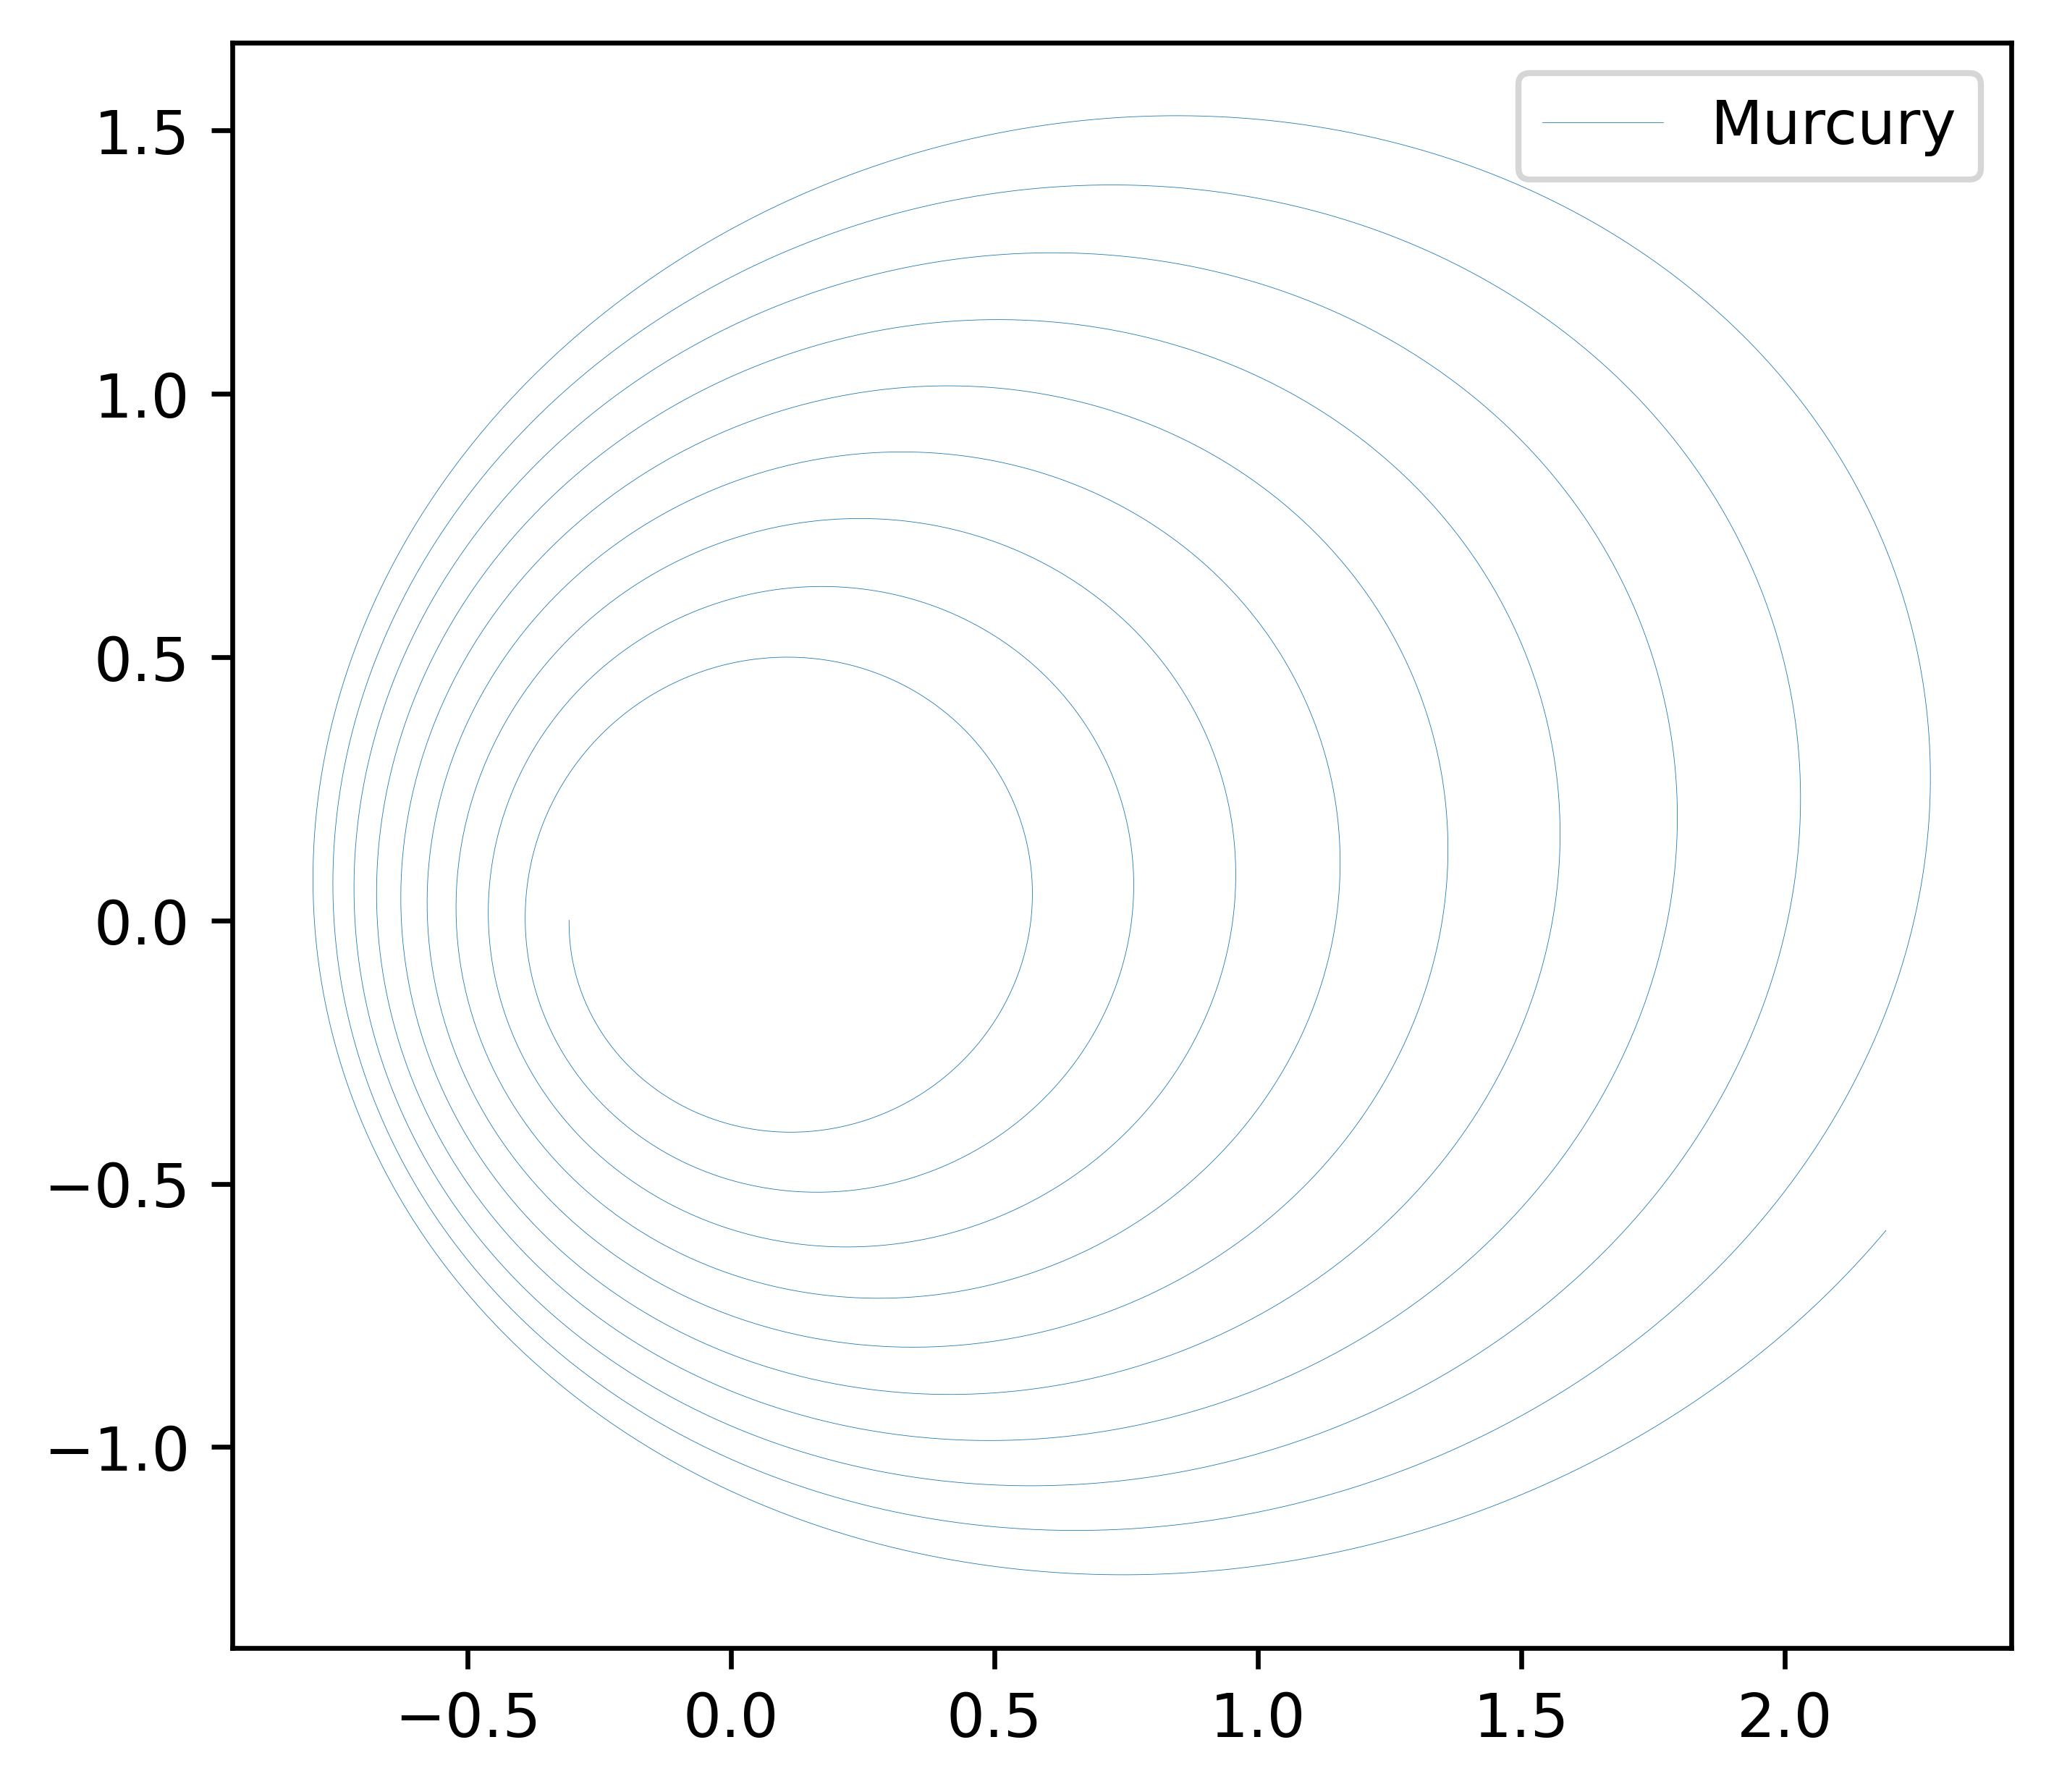

In [6]:
def orbit1(M1,m2,rp,e,N,dt,alpha):
    def zeta1(xi,t=None,param=None):
        r = (xi[0]*xi[0]+xi[1]*xi[1])**1.5
        return np.array([xi[2],xi[3],
                          -4*np.pi*np.pi*xi[0]/r+((alpha*xi[0])/r**4),
                          -4*np.pi*np.pi*xi[1]/r+((alpha*xi[1])/r**4)])
    if alpha > 0:
        a = rp/(1+e)
    else:
        a = rp/(1-e)
    chi = a
    M = M1+m2
    tau = np.sqrt(4*np.pi*np.pi*(a**3)/(G_SI*M))

    t_init = 0.0
    v = np.sqrt((1+e)*G_SI*M1/rp)
    scale = np.array([tau,chi,chi,chi/tau,chi/tau])
    init = np.array([rp,0,0,v])
    t = np.arange(0,N*dt,dt)
    traj = iv.evolve(init,t_init,dt,N,zeta1,
                     iv.euler_step,scale)

    for f in traj:
        l = [m2/M*f[0]/AU,m2/M*f[1]/AU,
             -M1/M*f[0]/AU,-M1/M*f[1]/AU,
             m2/M*f[2],m2*M*f[3],
             -M1/M*f[2],-M1/M*f[3]]
        
        try:
            complete_traj.append(l)
        except NameError:
            complete_traj = [l]
    return t,complete_traj


dt = 0.001
dt = dt * Year

# Define alpha
alpha = 0

t_mur, traj_mur = orbit1(M_sun, M_mur, rp_mur, e_mur, 10000, dt, alpha)

x= [frame[2] for frame in traj_mur]
y= [frame[3] for frame in traj_mur]

fig = plt.figure()
ax = fig.add_subplot()

ax.set_aspect('equal')

ax.plot(x,y,label='Murcury',linewidth =.1)


plt.gcf().set_dpi(600)
ax.legend()
plt.show()

Here, even when $\alpha$ is zero, there is far too much error for Euler's method to accurately plot the orbit, as it just continues to become wider. Below is another graph with $\alpha$ set to 2


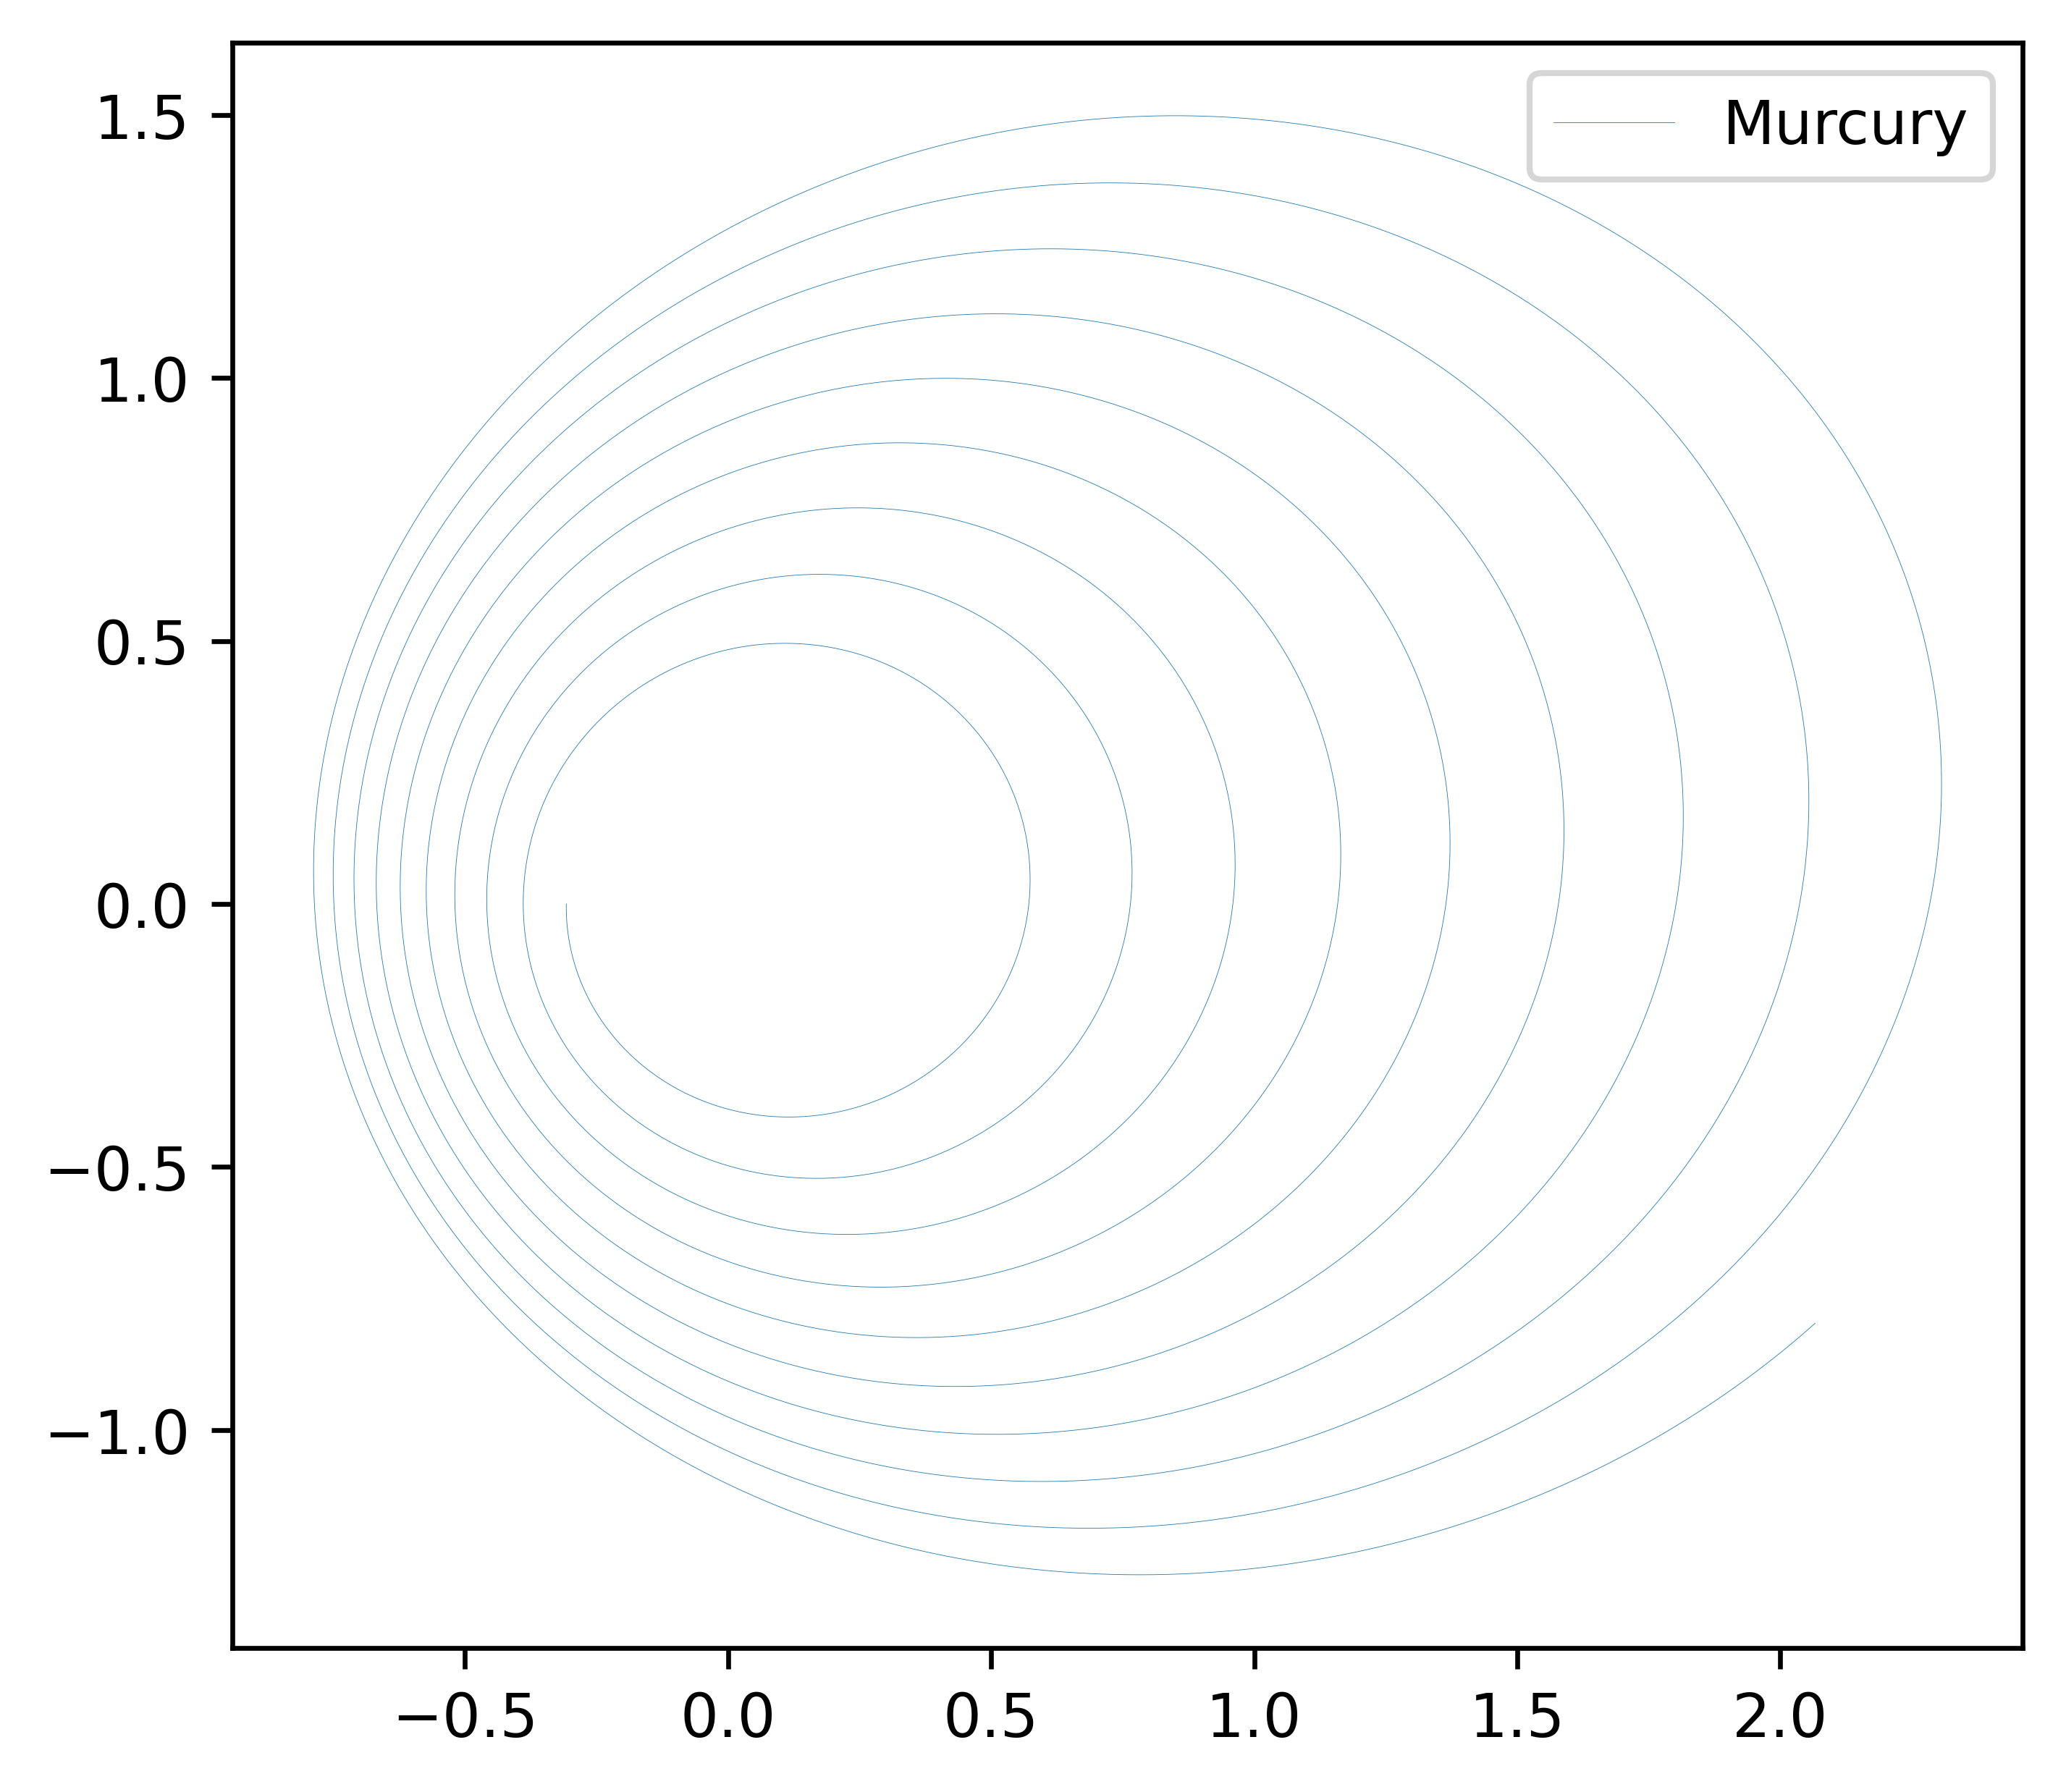

In [7]:
dt = 0.001
dt = dt * Year

# Define alpha
alpha = 2

t_mur, traj_mur = orbit1(M_sun, M_mur, rp_mur, e_mur, 10000, dt, alpha)

x= [frame[2] for frame in traj_mur]
y= [frame[3] for frame in traj_mur]

fig = plt.figure()
ax = fig.add_subplot()

ax.set_aspect('equal')

ax.plot(x,y,label='Murcury',linewidth =.1)


plt.gcf().set_dpi(600)
ax.legend()
plt.show()

References

Giordano, N. J., &amp; Nakanishi, H. (2006). Computational physics. Pearson/Prentice Hall. 